In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#Initializing things
total_cust = 1000
#Distributing them into four categories firstly, Assuming 95% pays before the due date
cust_befdue_pay = 95/100
#Assuming 2% paying 30 days after the last due date
cust_30_pay = 2/100
#Assuming 2% paying 45 days after the last due date
cust_45_pay = 2/100
#Assuming 1% paying 60 days after the last due date
cust_60_pay = 1/100
avg_bal = 1000
#late_fee = 50

#Total Revenue
mem_fee = 20*12*total_cust
aff_cost = 10*12*total_cust
rate = 15/100

#Total expenses
loss_rate = 3/100 
operating_cost =12*25*total_cust
cost_of_funds=12*total_cust*1000*0.065/12



In [12]:
#Calculations for Scenario 1
day=30
categories = 4
category_t= []
for cat in range(categories):
    if cat == 0:
        category_t.append("Paid before due date")
    else:
        category_t.append("paid after %d days of due date"%day)
        day+=15

data = pd.DataFrame({'Category':category_t},index=np.arange(1,categories+1))
data
        

,Category
1,Paid before due date
2,paid after 30 days of due date
3,paid after 45 days of due date
4,paid after 60 days of due date


In [44]:
int_card = 0
total_interest = 0
def int_calc(days):
    avg_days = 15
#Interest for 0 days    
    if days == category_t[0]:
        int_card = 0
#Interest for 30 days 
    elif days == category_t[1]:
        int_card = (avg_days + 15+30) * avg_bal * rate  /365
#Interest for 45 days         
    elif days == category_t[2]:
        int_card = (avg_days + 15+40) * avg_bal * rate /365
#Interest for 0 days 
    else:
        int_card=(avg_days+15+60)*avg_bal*rate/365
        
    return int_card 

    
def total_int(column):
    
    days=column[0]
    interest_card=column[1]
    
    if days==category_t[0]:
        total_interest=0
    #Interest for all customers: late by 30 days
    elif days==category_t[1]:
        total_interest=12*interest_card*cust_30_pay*total_cust
    #Interest for all customers: late by 45 days
    elif days==category_t[2]:
        total_interest=12*interest_card*cust_45_pay*total_cust
   #Interest for all customers: late by 60 days, remove these customers after non payment
    else:
        total_interest=12*interest_card*cust_60_pay*total_cust
        
    return total_interest

def PnL_check(): # Column name based on profit/loss
    if net_profit_loss>=0:
        return 'Profit margin in percentage'
    else:
        return 'Loss margin in percentage' 
    


In [45]:
#Adding colums in data for analysis
data['Estimated_Interest']=data['Category'].apply(int_calc).round(2)
data['Total_Interest_1Year']=data[['Category','Estimated_Interest']].apply(total_int,axis=1)
data['Fixed_Late_Fee_charge']=data['Estimated_Interest'].apply(lambda x: 0 if x==0 else 50)
data

,Category,Estimated_Interest,Total_Interest_1Year,Fixed_Late_Fee_charge
1,Paid before due date,0.00,0.0,0
2,paid after 30 days of due date,24.66,5918.4,50
3,paid after 45 days of due date,28.77,6904.8,50
4,paid after 60 days of due date,36.99,4438.8,50


In [47]:
#Profit generation
Expenses=cost_of_funds+operating_cost+(loss_rate*total_cust*avg_bal)
Earnings=mem_fee+aff_cost+np.sum(data['Total_Interest_1Year'])+(12*max(data['Fixed_Late_Fee_charge'])*5/100*total_cust)

margin=Earnings-Expenses # margin earned above or below total amount spent
net_profit_loss=margin/Expenses*100
    
report=pd.DataFrame({'Total yearly card balance':12*avg_bal*total_cust,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])
report

,Total yearly card balance,Earnings,Expenses,Margin,Profit margin in percentage
,12000000,407262.0,395000.0,12262.0,3.1


In [168]:
#Analysis for Scenario 2
total_cust = 1000
mem_fee = 20#Initial fee which is going to grow at 0.05% rate now
avg_bal = 1000#Initial fee which is going to grow at 0.05% rate now
mem_growth_rate = 0.05
bal_growth_rate = 0.05
total_months=np.arange(1,13)
#Function created for new membership cost every month
def mem_calc(mem_fee,mem_growth_rate):
    membership =[]
    for m in total_months.round(0):
        membership.append(mem_fee)
        new_mem_fee = mem_fee+mem_fee*(mem_growth_rate)
        mem_fee = new_mem_fee
    return membership

def bal_calc(avg_bal,bal_growth_rate):
    balance =[]
    for b in total_months.round(0):
        balance.append(avg_bal)
        new_bal = avg_bal+avg_bal*(bal_growth_rate)
        avg_bal = new_bal
    return balance

# calling the above functions

per_month_mem_fee=mem_calc(mem_fee,mem_growth_rate)
bal_per_month=bal_calc(avg_bal,bal_growth_rate)

data2=pd.DataFrame({'Month':total_months,'Balance(per month)':bal_per_month,'Membership Fee':per_month_mem_fee},index=[' ' for index in total_months]).round(2)
data2



,Month,Balance(per month),Membership Fee
,1,1000.00,20.00
,2,1050.00,21.00
,3,1102.50,22.05
,4,1157.62,23.15
,5,1215.51,24.31
,6,1276.28,25.53
,7,1340.10,26.80
,8,1407.10,28.14
,9,1477.46,29.55
,10,1551.33,31.03


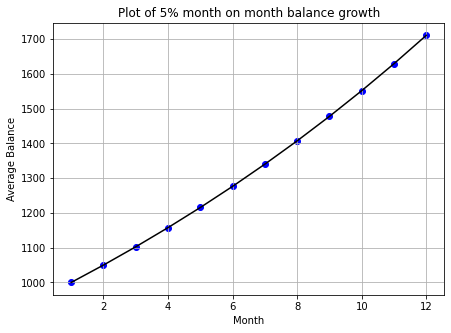

In [79]:
plt.figure(figsize=(7,5))
plt.title('Plot of 5% month on month balance growth')
plt.plot(total_months,bal_per_month,c='black')
plt.scatter(total_months,bal_per_month,c='b')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Average Balance',fontsize=10)
plt.grid()
plt.show()
#As we can observe that with the increasing monnth avg balance is also inncreasing

In [156]:
total_cust = 1000
late_fee = 50
def interest_calc(avg_bal):
    
    # Interest Compounded quarterly and caculated monthly
    Int_per_card=(avg_bal*(1+rate/4)**4-avg_bal)/12   
    return np.round(Int_per_card,2)

# Reduce number of active accounts when customers don't pay 60 days after duedate
# Service will be discontinued 

def active_customers():
    total_cust = 1000
    active_cust=[]
    for month in total_months:
        if month>3:
            update_customers=total_cust-cust_60_pay*total_cust
            active_cust.append(int(update_customers))    
            total_cust=update_customers
        else:
            active_cust.append(int(total_cust)) 
            
    return active_cust

def int_30days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+30)/30)*cust_30_pay*customers*int_month

def int_45days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+45)/30)*cust_45_pay*customers*int_month

def int_60days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+60)/30)*cust_60_pay*customers*int_month

def total_charge(columns):
    
    return columns[0]+columns[1]+columns[2]+columns[3]    



In [157]:
late_fee = 50
data2['Interest_Relative_to_Balance']=data2['Balance(per month)'].apply(interest_calc)
data2.insert(4,'Active_customers',active_customers(),True)

data2['Total_Interest_30days_late']=data2[['Interest_Relative_to_Balance','Active_customers']].apply(int_30days,axis=1)
data2['Total_Interest_45days_late']=data2[['Interest_Relative_to_Balance','Active_customers']].apply(int_45days,axis=1)
data2['Total_Interest_60days_late']=data2[['Interest_Relative_to_Balance','Active_customers']].apply(int_60days,axis=1)
data2['Total_Late_Charges_Collected']=(data2.iloc[:,5:]).apply(total_charge,axis=1)



data2

,Month,Balance(per month),Membership Fee,Interest_Relative_to_Balance,Active_customers,Active_customers,Active_customers,Active_customers,Active_customers,Active_customers,...,Active_customers,Active_customers,Active_customers,Active_customers,Active_customers,Active_customers,Total_Interest_30days_late,Total_Interest_45days_late,Total_Interest_60days_late,Total_Late_Charges_Collected
,1,1000.00,20.00,13.22,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,528.8000,793.2000,396.6000,4000.0
,2,1050.00,21.00,13.88,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,555.2000,832.8000,416.4000,4000.0
,3,1102.50,22.05,14.58,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,583.2000,874.8000,437.4000,4000.0
,4,1157.62,23.15,15.30,990,990,990,990,990,990,...,990,990,990,990,990,990,605.8800,908.8200,454.4100,3960.0
,5,1215.51,24.31,16.07,980,980,980,980,980,980,...,980,980,980,980,980,980,629.9440,944.9160,472.4580,3920.0
,6,1276.28,25.53,16.87,970,970,970,970,970,970,...,970,970,970,970,970,970,654.5560,981.8340,490.9170,3880.0
,7,1340.10,26.80,17.72,960,960,960,960,960,960,...,960,960,960,960,960,960,680.4480,1020.6720,510.3360,3840.0
,8,1407.10,28.14,18.60,950,950,950,950,950,950,...,950,950,950,950,950,950,706.8000,1060.2000,530.1000,3800.0
,9,1477.46,29.55,19.53,941,941,941,941,941,941,...,941,941,941,941,941,941,735.1092,1102.6638,551.3319,3764.0
,10,1551.33,31.03,20.51,932,932,932,932,932,932,...,932,932,932,932,932,932,764.6128,1146.9192,573.4596,3728.0


In [160]:

# total membership fee over the year
    
total_mem_fee=0
for mem_fee,total_cust in zip(data2['Membership Fee'],data2['Active_customers']):
    total_mem_fee= total_mem_fee+ mem_fee* total_cust
    
# total affiliation fee over the year 
    
total_affil_fee=0
for total_cust in data2['Active_customers']:
    total_affil_fee=total_affil_fee+aff_cost*total_cust.round(2)
    
    
card_bal=np.sum(data2['Balance(per month)']*data2['Active_customers'])
    
Expenses=cost_of_funds+operating_cost+loss_rate
Earnings=total_mem_fee+total_affil_fee+np.sum(data2['Total_Late_Charges_Collected'])

margin=Earnings-Expenses 
net_profit_loss=margin/Expenses*100
    
Report2=pd.DataFrame({'Total yearly card balance':card_bal,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])

Report2

TypeError: can't multiply sequence by non-int of type 'float'